# Piecewise Linear Connected

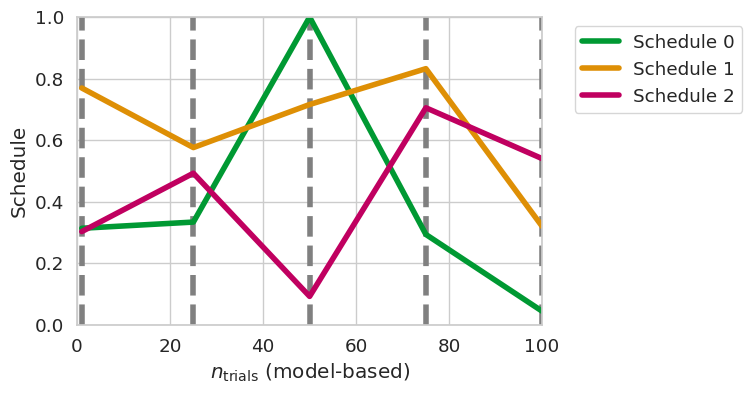

In [1]:
import ConfigSpace.hyperparameters as CSH
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ConfigSpace import ConfigurationSpace
from carps.analysis.utils import setup_seaborn, savefig

setup_seaborn(font_scale=1.2)

n_trials = 100
x_trials = np.arange(1, n_trials + 1)
xlabel = "$n_\mathrm{trials}$ (model-based)"
ylabel = "Schedule"
n_configs = 3
colors = [ "#009933", "C1", "#C00060"]

n_segments = 4
min_bound = 0
max_bound = 1

cs = ConfigurationSpace(seed=344)
for i in range(n_segments + 1):
    cs.add(CSH.UniformFloatHyperparameter(f"splitx{i}", lower=min_bound, upper=max_bound, log=False))

splits = np.linspace(1, n_trials, n_segments + 1, dtype=int)
configs = cs.sample_configuration(size=n_configs)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

for split in splits:
    ax.axvline(split, color="grey", linewidth=4, linestyle="--")

for i, config in enumerate(configs):
    splity = list(dict(config).values())
    val = np.interp(x_trials, splits, splity)

    ax.plot(x_trials, val, color=colors[i], linewidth=4, label=f"Schedule {i}")


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_xlim(0, n_trials)
ax.set_ylim(min_bound, max_bound)
ax.legend(bbox_to_anchor=(1.05, 1))
savefig(fig, "figures/piecewise_schedules_connected")
plt.show()


# Piecewise Linear with Jumps

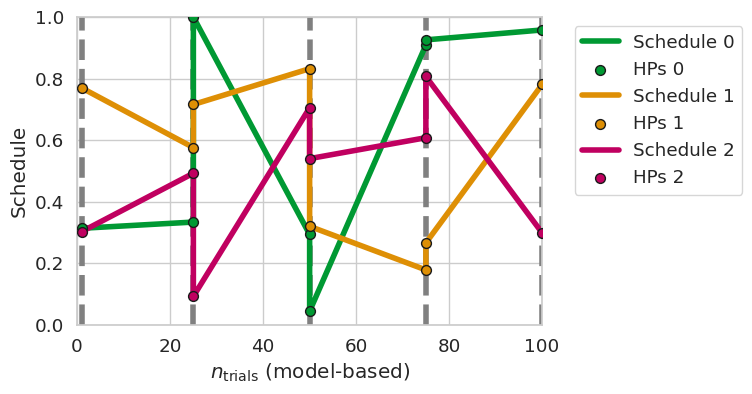

In [7]:
import ConfigSpace.hyperparameters as CSH
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ConfigSpace import ConfigurationSpace
from carps.analysis.utils import setup_seaborn, savefig

setup_seaborn(font_scale=1.2)

n_trials = 100
x_trials = np.arange(1, n_trials + 1)
xlabel = "$n_\mathrm{trials}$ (model-based)"
ylabel = "Schedule"
n_configs = 3
colors = [ "#009933", "C1", "#C00060"]

n_segments = 4
min_bound = 0
max_bound = 1
n_hps = n_segments * 2

cs = ConfigurationSpace(seed=344)
for i in range(n_hps):
    cs.add(CSH.UniformFloatHyperparameter(f"schedule_{i}", lower=min_bound, upper=max_bound, log=False))

splits = np.linspace(1, n_trials, n_segments + 1, dtype=int)
configs = cs.sample_configuration(size=n_configs)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

for split in splits:
    ax.axvline(split, color="grey", linewidth=4, linestyle="--")

for i, config in enumerate(configs):
    splity = list(dict(config).values())
    y = []
    x = []
    x_split = np.concatenate([np.array([splits[0]]), np.repeat(splits[1:-1], 2), np.array([splits[-1]])])
    for j in range(n_hps - 1):
        x_min, x_max = x_split[j:j+2]
        x_query = np.arange(x_min, x_max+1)
        val = np.interp(x_query, x_split[j:j+2], splity[j:j+2])
        y.append(val)
        x.append(x_query)
    y = np.concatenate(y)
    x = np.concatenate(x)

    ax.plot(x, y, color=colors[i], linewidth=4, label=f"Schedule {i}")
    ax.scatter(x_split, splity, marker="o", color=colors[i], label=f"HPs {i}", zorder=999, s=50, edgecolor="k")


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_xlim(0, n_trials)
ax.set_ylim(min_bound, max_bound)
ax.legend(bbox_to_anchor=(1.05, 1))
savefig(fig, "figures/piecewise_schedules_withjumps")
plt.show()
